# Explore here

**Imports**

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from pmdarima import auto_arima
from pickle import dump

In [3]:
url = 'https://raw.githubusercontent.com/4GeeksAcademy/alternative-time-series-project/main/sales.csv'
raw_data = pd.read_csv(url)
raw_data.head()

,date,sales
0,2022-09-03 17:10:08.079328,55.292157
1,2022-09-04 17:10:08.079328,53.803211
2,2022-09-05 17:10:08.079328,58.141693
3,2022-09-06 17:10:08.079328,64.530899
4,2022-09-07 17:10:08.079328,66.013633


In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    366 non-null    object 
 1   sales   366 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB


In [37]:
df = raw_data.copy()
df['date'] = pd.to_datetime(df.date).dt.date
df.set_index('date', inplace=True)

In [38]:
df.head()

,sales
date,
2022-09-03,55.292157
2022-09-04,53.803211
2022-09-05,58.141693
2022-09-06,64.530899
2022-09-07,66.013633


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 366 entries, 2022-09-03 to 2023-09-03
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sales   366 non-null    float64
dtypes: float64(1)
memory usage: 5.7+ KB


<Axes: xlabel='date'>

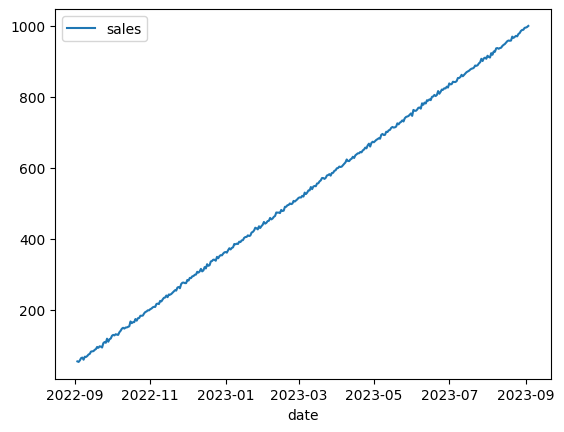

In [39]:
sns.lineplot(df)

In [40]:
decomposition = seasonal_decompose(df, period = 12)
decomposition

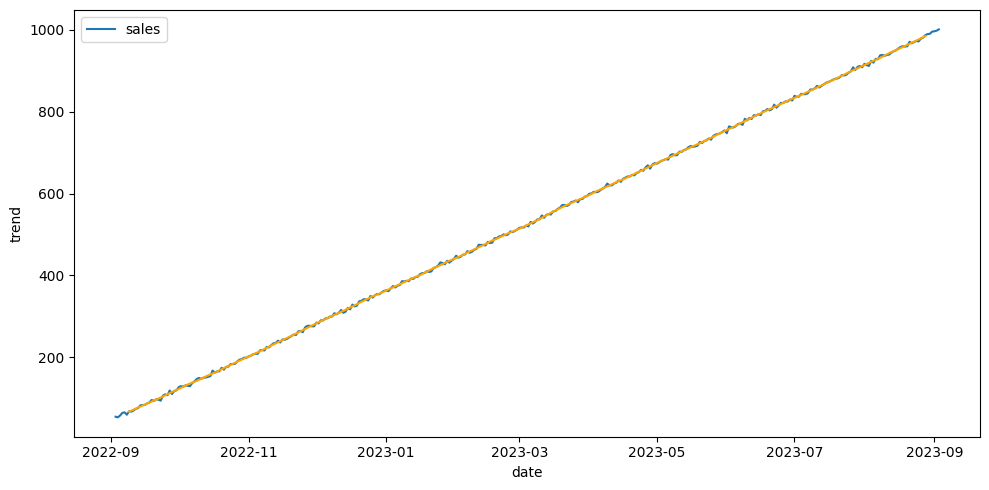

In [41]:
trend = decomposition.trend

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(df)
sns.lineplot(trend, color='orange')
plt.tight_layout()
plt.show()


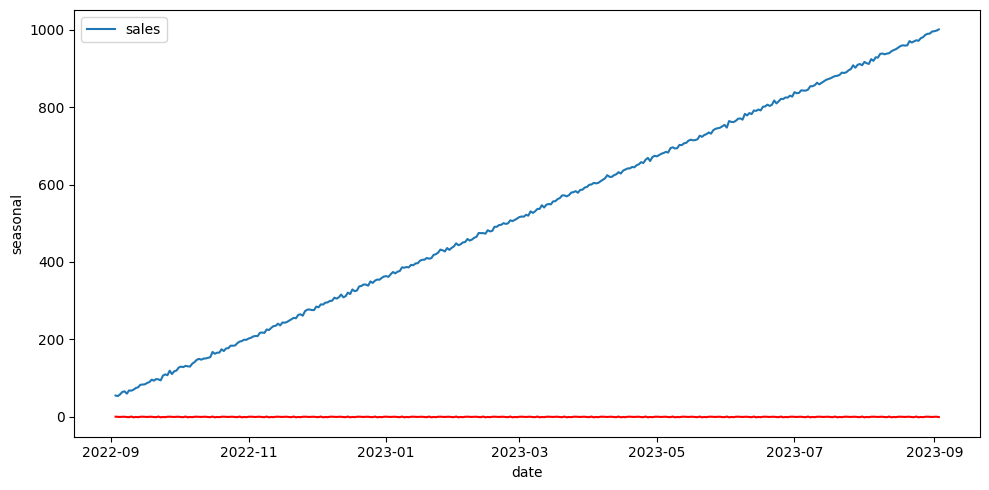

In [42]:
seasonal = decomposition.seasonal

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(df, color='blue')
sns.lineplot(seasonal, color='red')
plt.tight_layout()
plt.show()

There is no seasonality in the data.

**Checking if data is stationary with Dickey-Fuller test**

In [55]:
def adf_test(timeseries):
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries, autolag="AIC")
    dfoutput = pd.Series(
        dftest[0:4],
        index=[
            "Test Statistic",
            "p-value",
            "#Lags Used",
            "Number of Observations Used",
        ],
    )
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)" % key] = value
    print(dfoutput)
    print()
    if dftest[1] > 0.05:
        print('Data is not stationary, p-value = {dftest[1]}')
    elif dftest[1] < 0.05:
        print(f'Data is stationary, p-value = {dftest[1]:.18f}' )

adf_test(df)



Results of Dickey-Fuller Test:
Test Statistic                   0.545414
p-value                          0.986190
#Lags Used                      13.000000
Number of Observations Used    352.000000
Critical Value (1%)             -3.449065
Critical Value (5%)             -2.869786
Critical Value (10%)            -2.571163
dtype: float64

Data is not stationary, p-value = {dftest[1]}


**Analysis of variability**

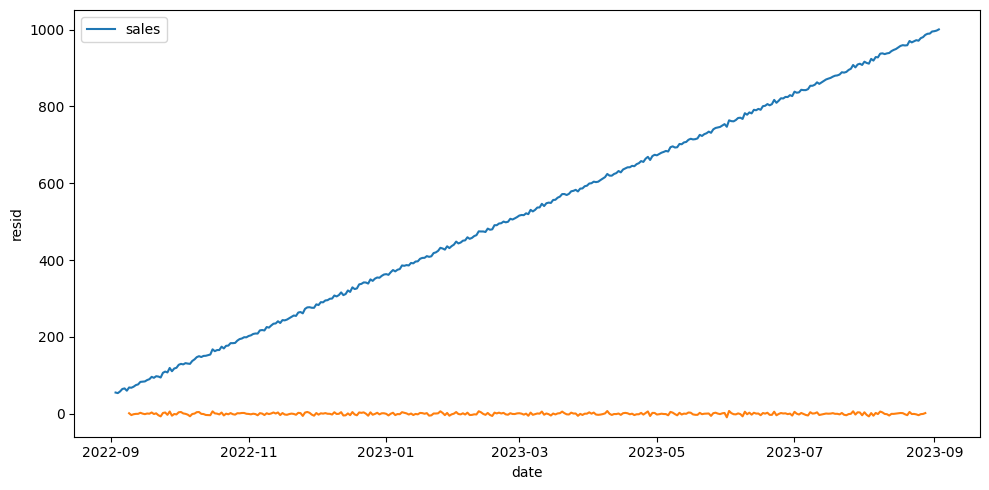

In [ ]:
residual = decomposition.resid

fig, axis = plt.subplots(figsize = (10, 5))
sns.lineplot(df)
sns.lineplot(residual)
plt.tight_layout()
plt.show()

There is no variability in the data.

**Autocorrelation analysis**

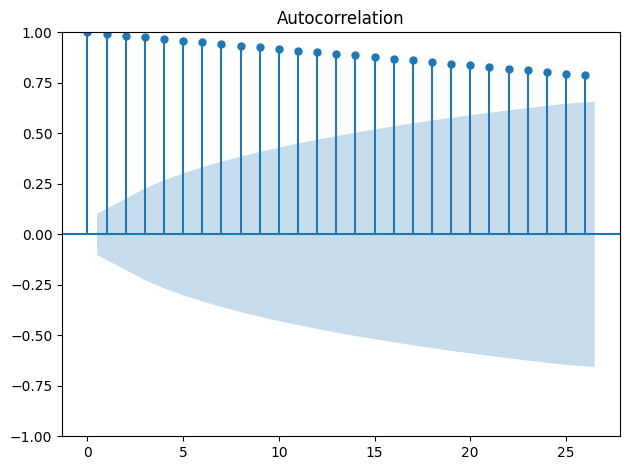

In [ ]:
plot_acf(df)
plt.tight_layout()
plt.show()

**Training the model**

In [73]:
model = auto_arima(df, seasonal=False, trace=True, lags=10)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1843.274, Time=0.69 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2096.542, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1970.972, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1839.586, Time=0.25 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2209.657, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1839.552, Time=0.26 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1841.532, Time=0.43 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1843.586, Time=0.21 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1839.607, Time=0.27 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1922.648, Time=0.14 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=inf, Time=0.33 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 2.675 seconds


In [74]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  366
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -915.776
Date:                Wed, 06 Dec 2023   AIC                           1839.552
Time:                        19:34:57   BIC                           1855.152
Sample:                    09-03-2022   HQIC                          1845.752
                         - 09-03-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.8110      0.134     21.055      0.000       2.549       3.073
ar.L1         -0.0821      0.052     -1.592      0.111      -0.183       0.019
ma.L1         -0.9413      0.020    -47.701      0.000      -0.980      -0.903
sigma2         8.7903      0.688     12.777      0.000       7.442      10.139
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.76
Prob(Q):                              1.00   Prob(JB):                         0.68
Heteroskedasticity (H):               0.90   Skew:                             0.07
Prob(H) (two-sided):                  0.58   Kurtosis:                         2.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [77]:
forecast = model.predict(365)
forecast

2023-09-04    1002.158148
2023-09-05    1004.831669
2023-09-06    1007.423289
2023-09-07    1010.021630
2023-09-08    1012.619419
                 ...     
2024-08-29    1937.447273
2024-08-30    1940.045104
2024-08-31    1942.642935
2024-09-01    1945.240767
2024-09-02    1947.838598
Freq: D, Length: 365, dtype: float64

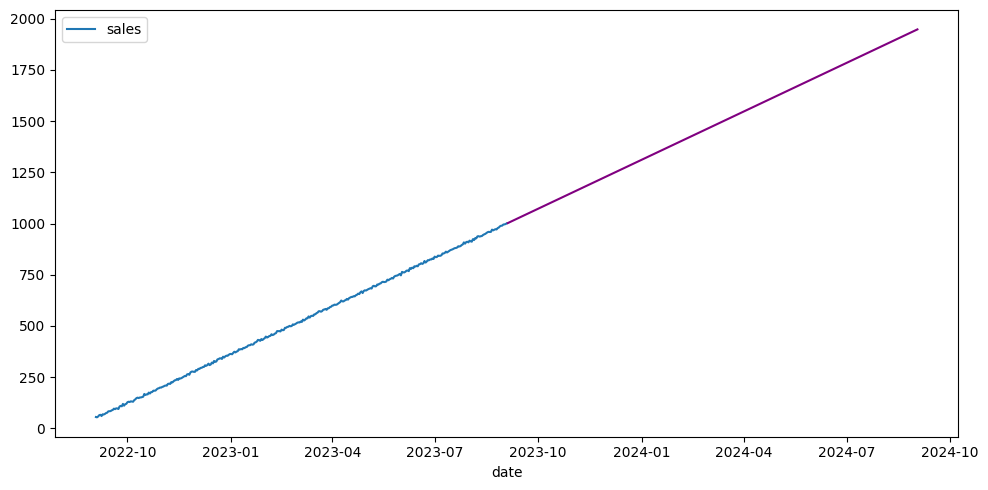

In [78]:
fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(df)
sns.lineplot(forecast, color='purple')
plt.tight_layout()
plt.show()

**Saving the model**

In [ ]:
dump(model, open("../models/time_series_sales.sav", "wb"))